# Data visualization

Open RStudio.

Open a new R script in R and **save it as** `wpa_3_LastFirst.R` (where Last and First is your last and first name). 

Careful about: capitalizing, last and first name order, and using `_` instead of `-`.

At the top of your script, write the following (**with appropriate changes**):

In [1]:
# Assignment: WPA 3
# Name: Laura Fontanesi
# Date: 16 March 2021

library(tidyverse)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



#### Load some data in R

For this week, we are going to work with the US survey dataset on public ppinion about climate change (2008-2017).

You can find the original dataset [here](https://osf.io/w36gn/), and more explanations about the content/coding of the variables.

I selected a few variables and prepared the dataset already, so that you can simply load it in R using the following command:

In [2]:
# Load data in R
survey_data = read_csv("https://raw.githubusercontent.com/laurafontanesi/r-seminar/master/data/ccam_modified.csv")

glimpse(survey_data)


── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  cause_recoded = col_character(),
  sci_consensus = col_character(),
  gender = col_character(),
  race = col_character(),
  party_x_ideo = col_character(),
  region4 = col_character(),
  employment = col_character(),
  happening_labels = col_character(),
  age_category_labels = col_character(),
  educ_category_labels = col_character(),
  income_category_labels = col_character()
)
ℹ Use `spec()` for the full column specifications.




Rows: 18,514
Columns: 30
$ wave                   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ year                   <dbl> 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008,…
$ happening              <dbl> 3, 2, 2, 3, 3, 2, 3, 1, 1, 3, 3, 3, 3, 3, 3, 2,…
$ cause_recoded          <chr> "natural and human", "natural and human", "natu…
$ sci_consensus          <chr> "happening", "dont know", "disagreement", "happ…
$ worry                  <dbl> 3, 2, 1, 3, 3, 2, 3, 2, 1, 3, 2, 3, 3, 3, 4, 2,…
$ harm_personally        <dbl> 2, 2, 1, 2, 0, 0, 2, 3, 1, 0, 0, 1, 3, 2, 4, 2,…
$ harm_US                <dbl> 3, -1, 1, 2, 0, 0, 3, 3, 1, 0, 0, 0, 3, 2, 4, 2…
$ harm_dev_countries     <dbl> 4, 2, 1, 3, 0, 0, 4, 3, 1, 0, 0, 0, 4, 2, 4, 2,…
$ harm_future_gen        <dbl> 4, 3, 1, 3, 0, 0, 4, 3, 1, 4, 0, 0, 4, 3, 4, 3,…
$ harm_plants_animals    <dbl> 4, 3, 1, 3, 3, 0, 4, 3, 1, 4, 0, 3, 4, 2, 4, 3,…
$ when_harm_US           <dbl> 5, 3, 1, 4, 2, 2, 5, 4, 1, 3, 3, 3, 5, 4, 5, 2,…
$ reg_CO2_pollu

## 1. Basic ggplot2 elements

In this course, we are going to use `ggplot2` for plotting.
You find the full `ggplot2` refererence [here](https://ggplot2.tidyverse.org/reference/index.html).

Every `ggplot2` graphic has three essential components (that we arleady saw in the [course introduction](https://nbviewer.jupyter.org/github/laurafontanesi/r-seminar/blob/main/notebooks/wpa1.ipynb)):

- `data`: the dataset containing the variables of interest.
- `geom`: the geometric object in question. This refers to the type of object we can observe in a plot. For example: points, lines, and bars.
- `mapping`: aesthetic attributes of the geometric object. They decide which variables of the dataset are shown and in which position. For example, the variables on the x- and y-axes, the variables that give the color or the size to specific elements.

The basic template for a plot is:
```
ggplot(data = <DATA>, mapping = aes(<MAPPINGS>)) + 
  <GEOM_FUNCTION>()
```
Where you would:

- call your dataframe instead of `<DATA>`
- specify the main variables and their position instead of `<MAPPINGS>`
- specify the type of plot insead of `<GEOM_FUNCTION>`

Note the `+` notation at the end of the first line. That is to tell `ggplot2` that you are still adding/changing components to/of the same plot. So, if you want to add/change other components, you would also put a `+` at the end of the second line and add a new function in the third line.

In the [course introduction](https://nbviewer.jupyter.org/github/laurafontanesi/r-seminar/blob/main/notebooks/wpa1.ipynb) we had for example:

```
ggplot(data = movies, mapping = aes(x = best_pic_nom, y = audience_score, fill = best_dir_win)) +
  geom_boxplot() +
  labs(x = "Movie Was Nominated For A Best Picture Oscar", y = "Audience Score", fill = "Director won oscar") +
  ggtitle("Relationship Between Audience Score, Movie Picture Oscar and Director Achievement")
```

- `movies` was the name of our dataframe
- `best_pic_nom` was the variable to show on the x-axis, `audience_score` on the y-axis, and `best_dir_win` as a color
- `geom_boxplot()` was the kind of plot (as boxplot in that case)
- `labs()` was to change the lables of the x- and y-axes, and of the color-legend
- `ggtitle()` was to change the title of the plot

So in this case `labs()` and `ggtitle()` were additional functions to add/change components to our plot.

#### 1.1 Aesthetic attributes

Their function depends on the specific plot (see below). But the main arguments are:

- `x`: the variable on the x-axis

- `y`: the variable on the y-axis

- `color`/`fill`: the variable that determines the color to the plots' elements

- `size`: the variable that determines the size to the plots' elements

- `shape`: the variable that determines the shape of the plots' elements

#### 1.2 Geometric objects

We use:

- **Bar plots**: `geom_bar()` to plot one value for each level of a categorical variable `x` (you can also split each level according to the levels of a second categorical variable using the `fill` aesthetic argument). Typically, these values are frequencies (how many observations are there per level?) or means (in this case you should compute the mean of a second variable `y` for each level of the categorical variable `x` before plotting).

- **Box and violin plots**: `geom_boxplot()` or `geom_violin()` to plot the the distribution of a continuous variable `y` for different levels of a categorical variable `x` (you can also add a third categorical variable using the `fill` aesthetic argument).

- **Histograms and density plots**: `geom_histogram()` or `geom_density()` to plot the the distribution of a continuous variable `x` (you can also plot separate distributions based on a second categorical variable using the `fill` aesthetic argument).

- **Scatter plots**: `geom_point()` to plot the relationship between 2 continuous variables. You can add a third variable (either continuous or categorical) using the `color` aesthetic argument. In case the third variable is continuous, we can also add the `scale_colour_gradient` function, to change the colour gradient. You can also choose to show the third variable as the size of the points instead of the colour using the `size` aesthetic argument. You could then show a maximum of 4 variables: 1 on the x-axis, one on the y-axis, one as colour, and one as size of the dots.

- **Lines**: `geom_abline()`, `geom_hline()`, `geom_vline()`, `geom_line()` and `geom_smooth()` to plot lines (typically to show the mean of a distribution, or a regression line in a scatter plot).

- **Error bars**: `geom_errorbar()` to add error bars (typically to bar plots or to line plots).

#### 1.3 Additional functions

- `facet_grid()` and `facet_wrap()`: to split a plot into several plots by the values of another variable.
- `scale_colour_gradient()`: to adjust the color gradient, when the color variable is continuous.
- `ggsave()`: to save the plot to file.
- `labs()`: to change the lables of the x- and y-axes, and of the color-legend.
- `ggtitle()`: to change the title of the plot.

#### 1.4 Additional arguments to functions

Note that each function can take additional arguments. In the example above, the `labs()` function took the additional `x`, `y` and `fill` arguments to specify which label corresponded to which variable.

## 2. Examples

In [3]:
# Ignore this (only for notebooks):
library(repr)
options(repr.plot.width=12, repr.plot.height=6)

In [4]:
glimpse(survey_data)

Rows: 18,514
Columns: 30
$ wave                   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ year                   <dbl> 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008,…
$ happening              <dbl> 3, 2, 2, 3, 3, 2, 3, 1, 1, 3, 3, 3, 3, 3, 3, 2,…
$ cause_recoded          <chr> "natural and human", "natural and human", "natu…
$ sci_consensus          <chr> "happening", "dont know", "disagreement", "happ…
$ worry                  <dbl> 3, 2, 1, 3, 3, 2, 3, 2, 1, 3, 2, 3, 3, 3, 4, 2,…
$ harm_personally        <dbl> 2, 2, 1, 2, 0, 0, 2, 3, 1, 0, 0, 1, 3, 2, 4, 2,…
$ harm_US                <dbl> 3, -1, 1, 2, 0, 0, 3, 3, 1, 0, 0, 0, 3, 2, 4, 2…
$ harm_dev_countries     <dbl> 4, 2, 1, 3, 0, 0, 4, 3, 1, 0, 0, 0, 4, 2, 4, 2,…
$ harm_future_gen        <dbl> 4, 3, 1, 3, 0, 0, 4, 3, 1, 4, 0, 0, 4, 3, 4, 3,…
$ harm_plants_animals    <dbl> 4, 3, 1, 3, 3, 0, 4, 3, 1, 4, 0, 3, 4, 2, 4, 3,…
$ when_harm_US           <dbl> 5, 3, 1, 4, 2, 2, 5, 4, 1, 3, 3, 3, 5, 4, 5, 2,…
$ reg_CO2_pollu

#### 2.1 Bar plot showing frequencies of a categorical variable, split by a second categorical variable

Note here what happens when you write `x = year` instead of `x = factor(year)`.
The point is that `ggplot` might not understand that `year` is a categorical variable (see in the dataframe summery above).
So, to make sure `ggplot` treats certain variables as categorical, you can sue the `factor()` function.

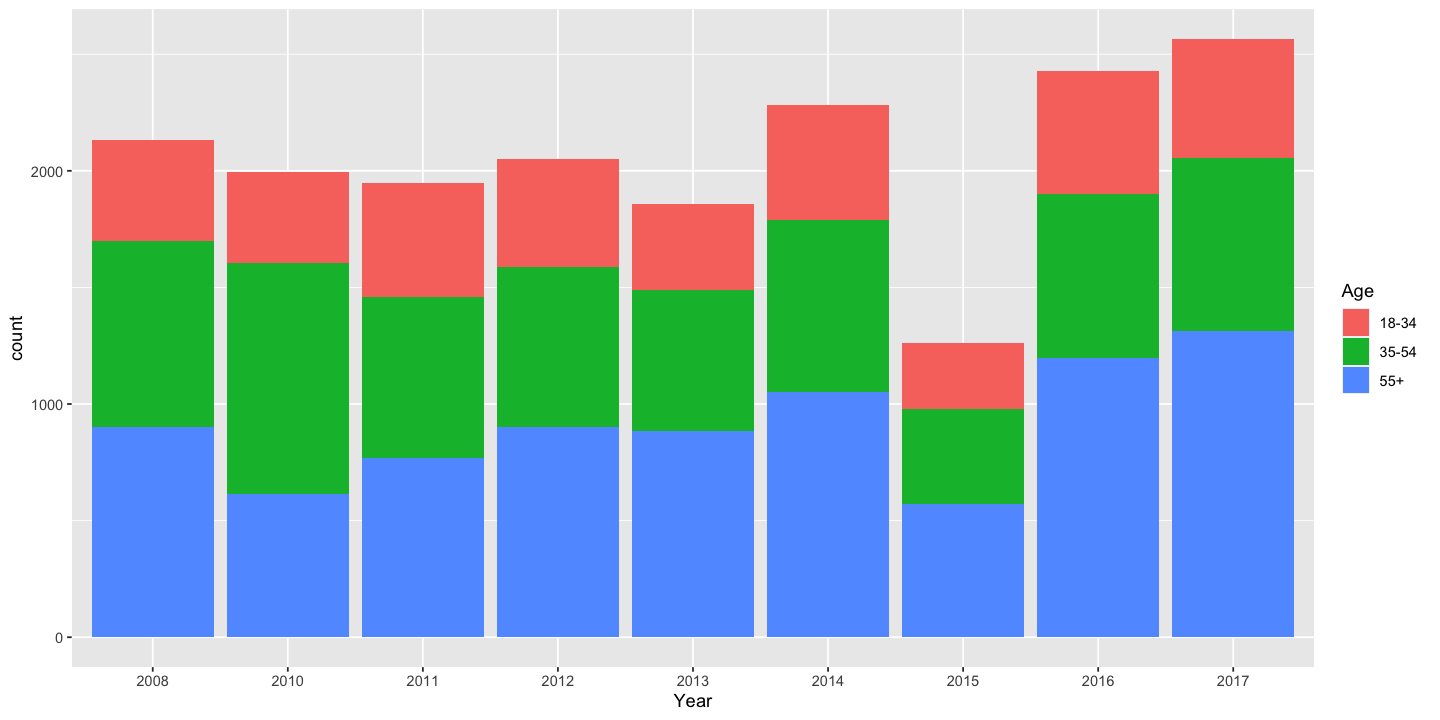

In [5]:
ggplot(data = survey_data, mapping = aes(x = factor(year), fill = age_category_labels)) + 
    geom_bar() +
    labs(x="Year", fill="Age")

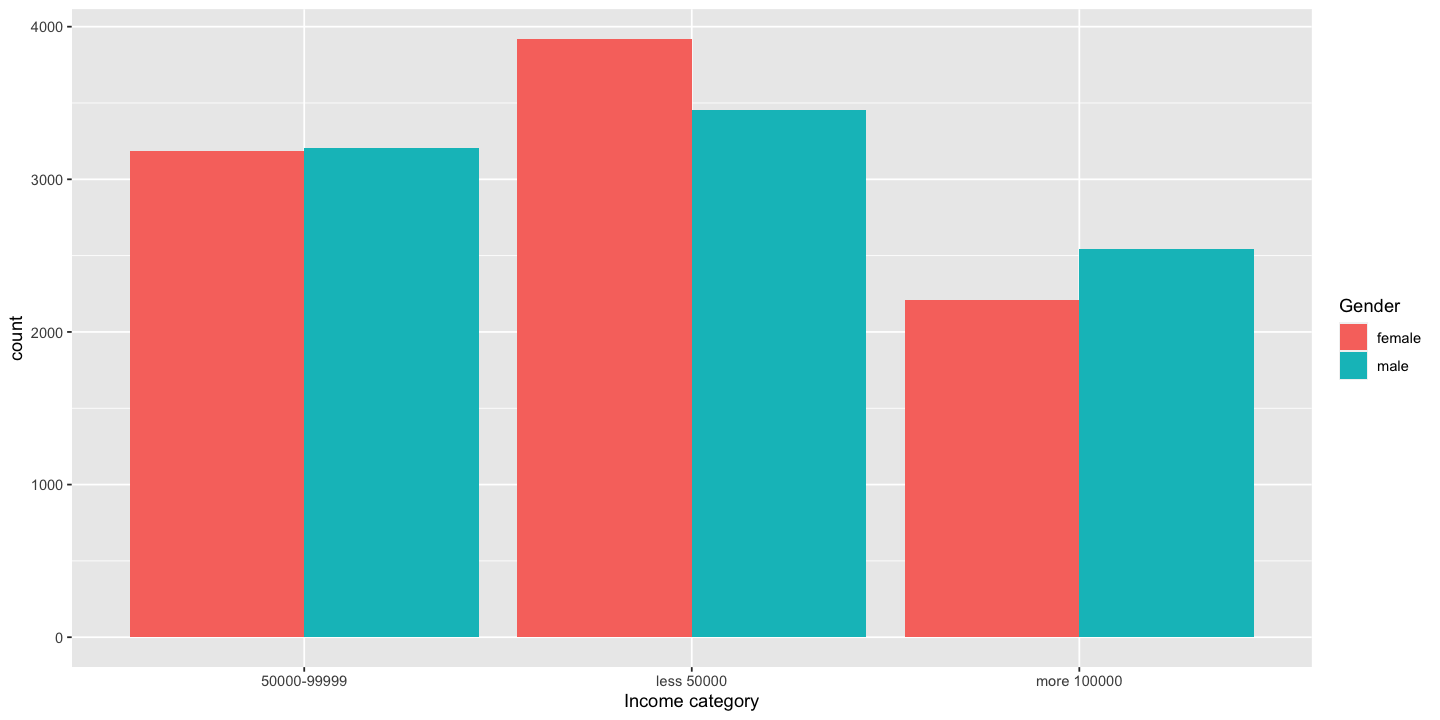

In [6]:
ggplot(data = survey_data, mapping = aes(x = income_category_labels, fill=gender)) + 
    geom_bar(position = "dodge") + 
    labs(x = "Income category", fill="Gender")

#### 2.2 Box plot showing the distribution of a continuous variable, for each level of a second categorical variable

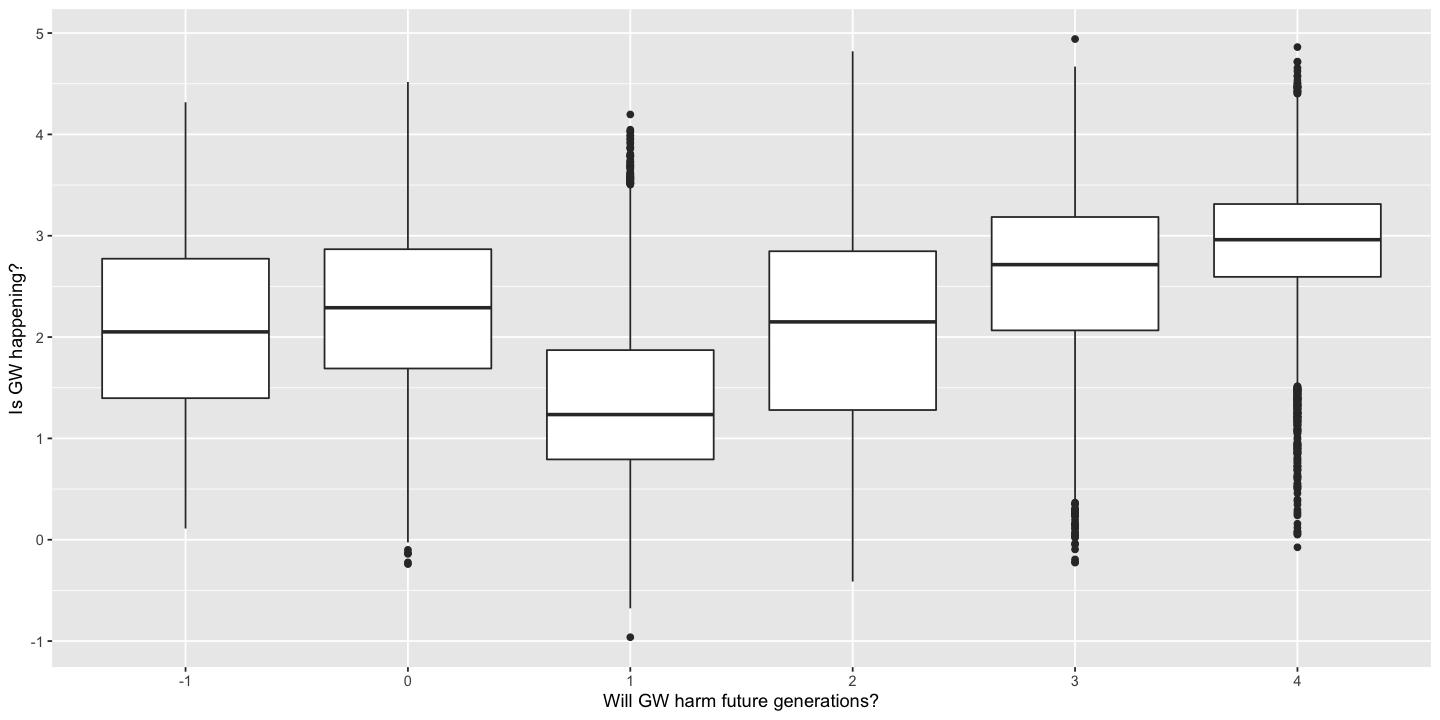

In [7]:
ggplot(data = survey_data, mapping = aes(x = factor(harm_future_gen), y = happening_cont)) + 
    geom_boxplot() + 
    labs(x = "Will GW harm future generations?", y='Is GW happening?')

#### 2.3 Box plot showing the distribution of a continuous variable, for each level of a second categorical variable, split by a third categorical variable using facet_grid

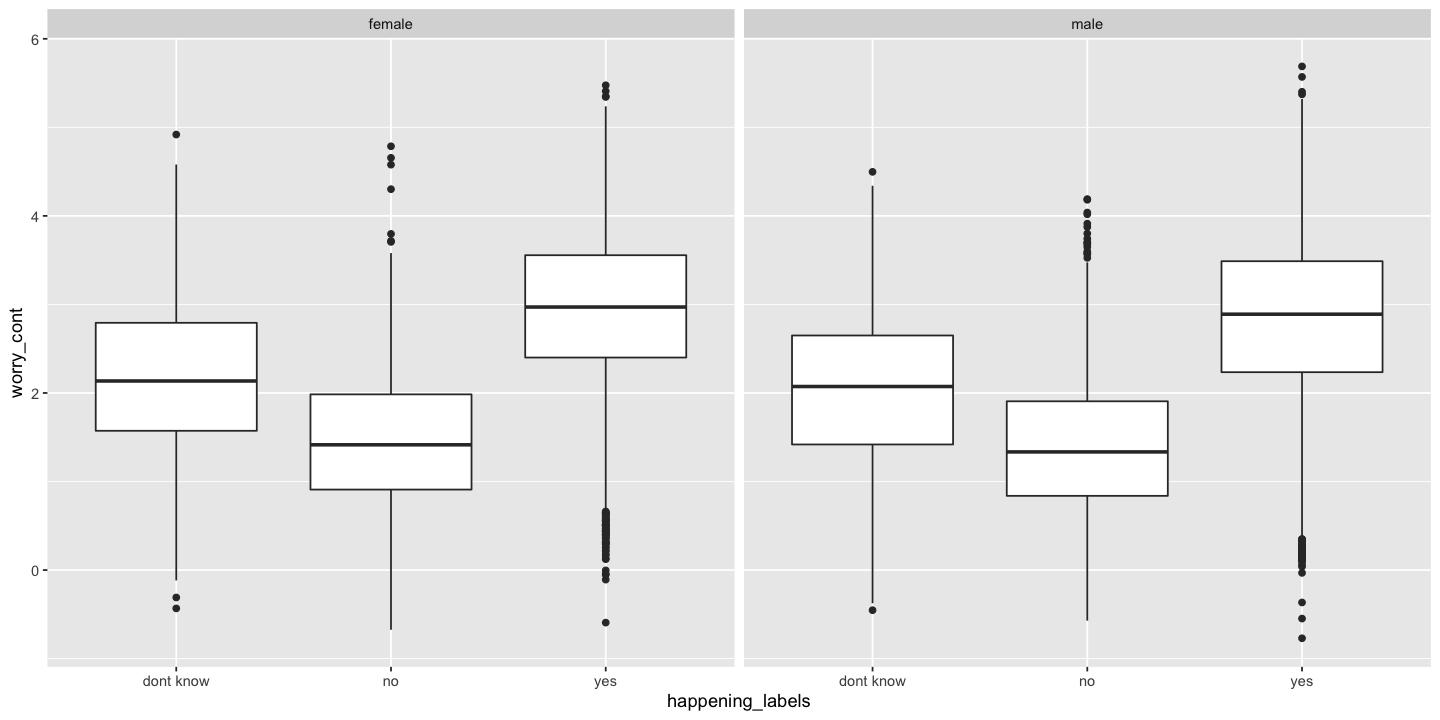

In [8]:
ggplot(data = survey_data, mapping = aes(x = happening_labels, y = worry_cont)) + 
    geom_boxplot() + 
    facet_grid(~ gender)

#### 2.4 Box plot showing the distribution of a continuous variable, for each level of a second categorical variable, split by a third categorical variable using fill

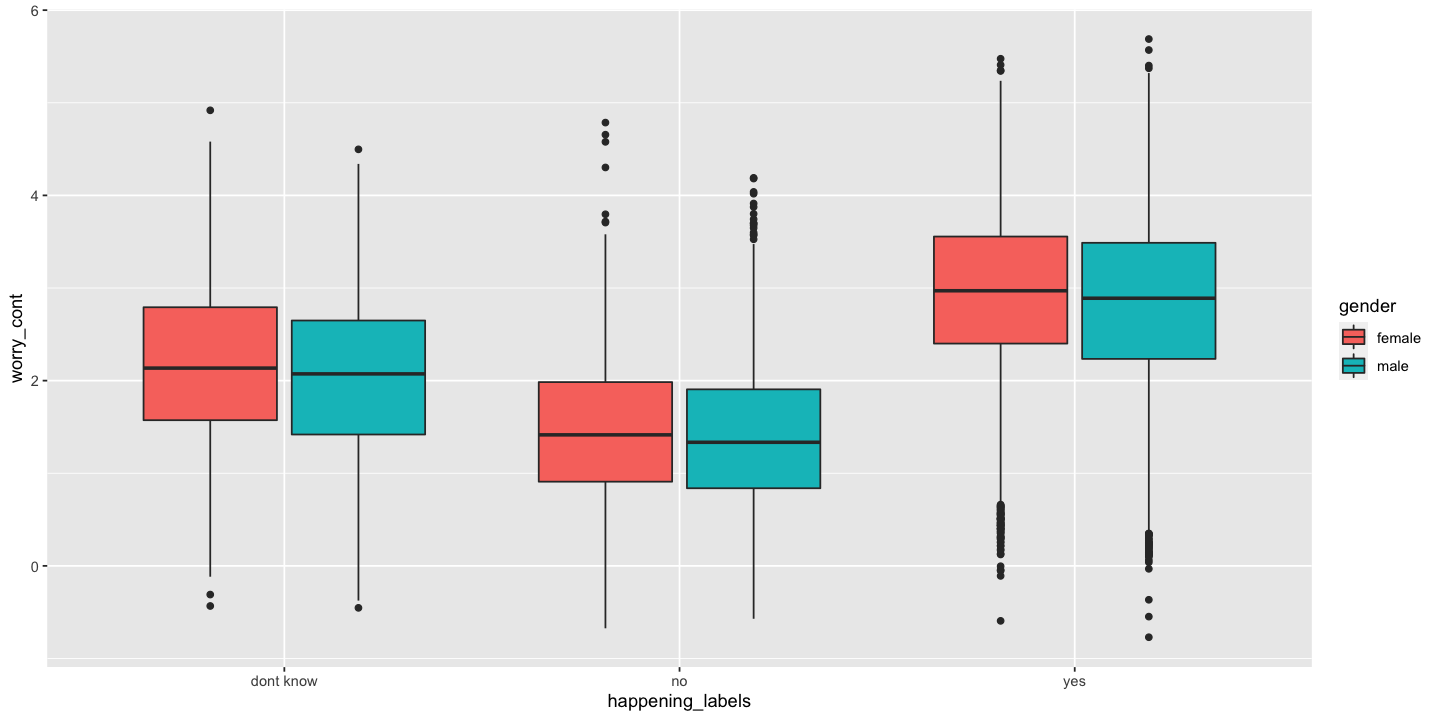

In [9]:
ggplot(data = survey_data, mapping = aes(x = happening_labels, y = worry_cont, fill = gender)) + 
    geom_boxplot()

#### 2.5 Violin plot showing the distribution of a continuous variable, for each level of a second categorical variable, split by a third categorical variable using the fill

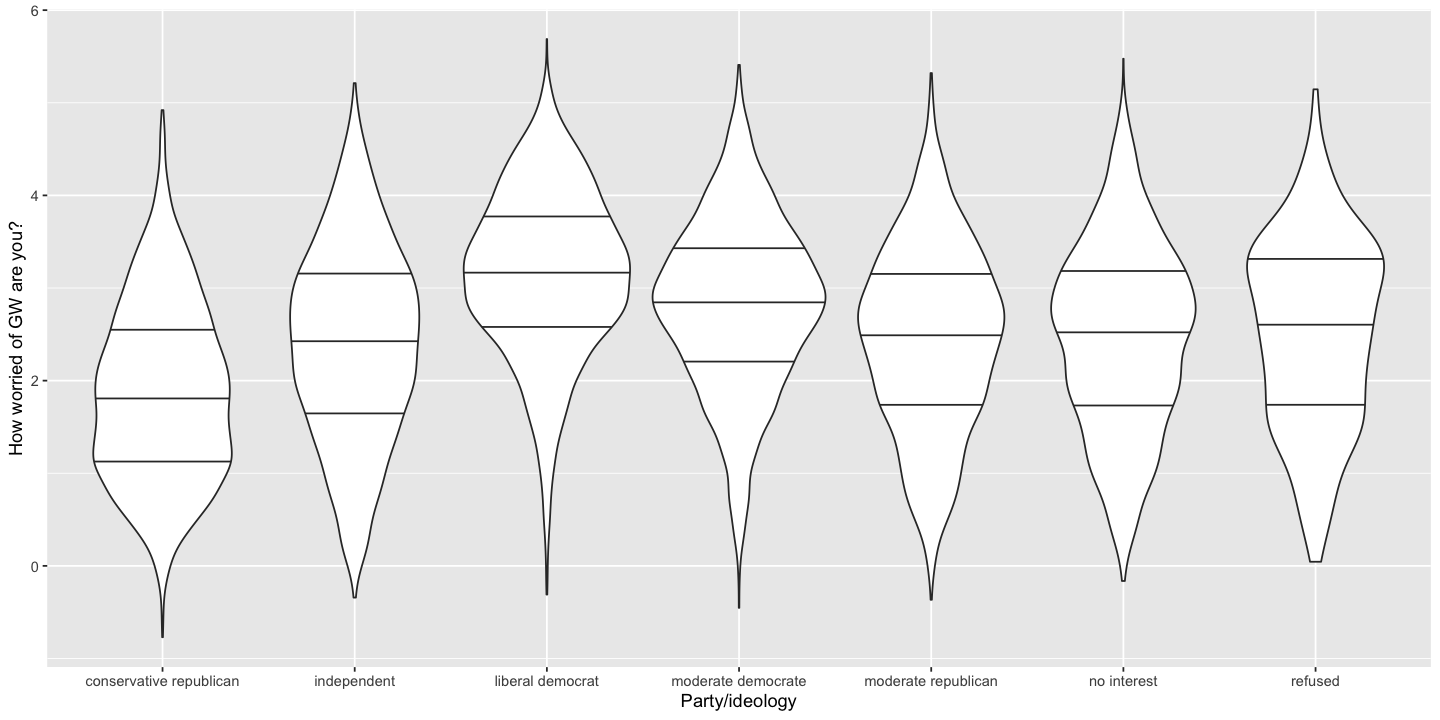

In [10]:
ggplot(data = survey_data, mapping = aes(x = party_x_ideo, y = worry_cont)) + 
    geom_violin(draw_quantiles = c(0.25, 0.5, 0.75)) +
    labs(x = "Party/ideology", y='How worried of GW are you?')

#### 2.6 Scatter plot showing the relationship between two continuous variables, split by a third categorical variable with colour, and with regression lines and vertical/horizontal lines showing the means

`geom_smooth()` using formula 'y ~ x'



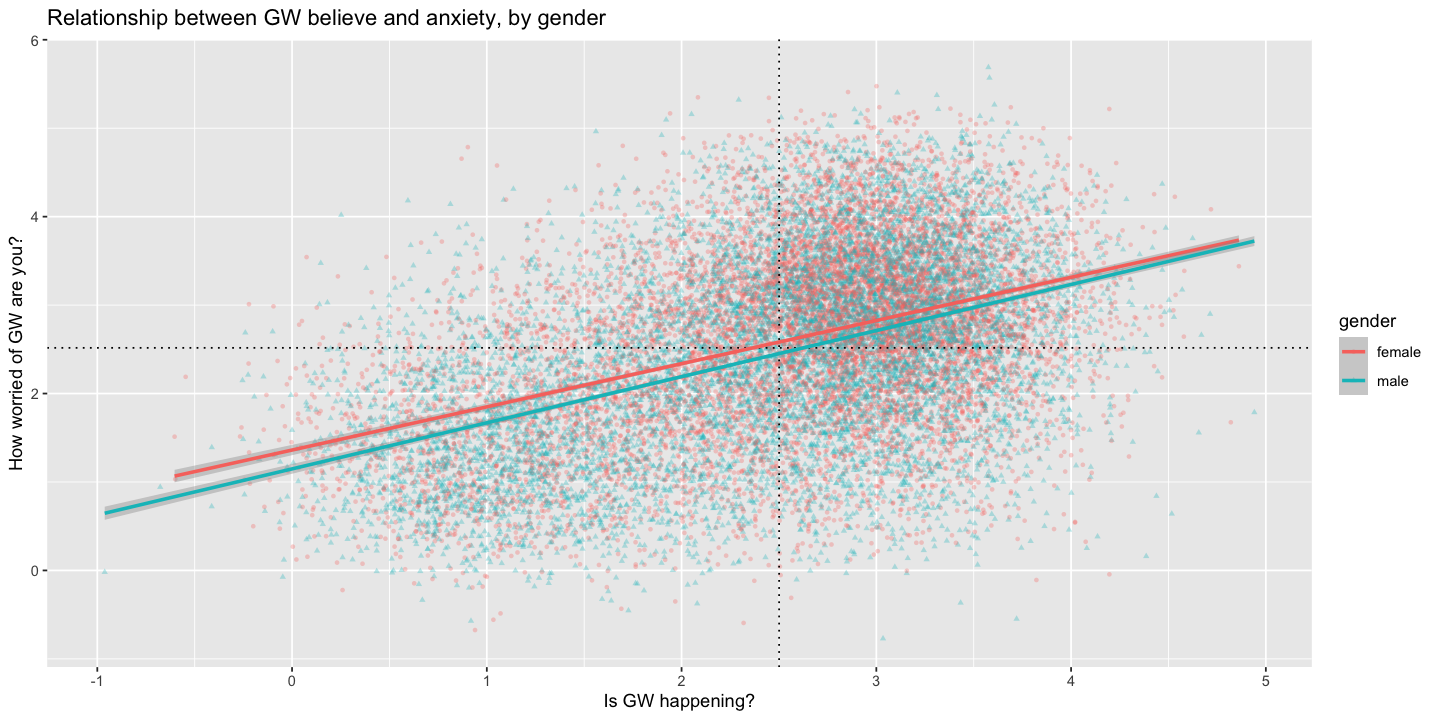

In [28]:
ggplot(data = survey_data, mapping = aes(x = happening_cont, y = worry_cont, shape=gender, color=gender)) + 
    geom_point(alpha = .3, size= 1) +
    geom_vline(xintercept = mean(survey_data$happening_cont), linetype="dotted") +
    geom_hline(yintercept = mean(survey_data$worry_cont), linetype="dotted") +
    geom_smooth(method = lm) +
    labs(x='Is GW happening?', y='How worried of GW are you?') +
    ggtitle("Relationship between GW believe and anxiety, by gender")

#### 2.7 Histogram showing the distribution of a continuous variable, split by a second categorical variable based on color

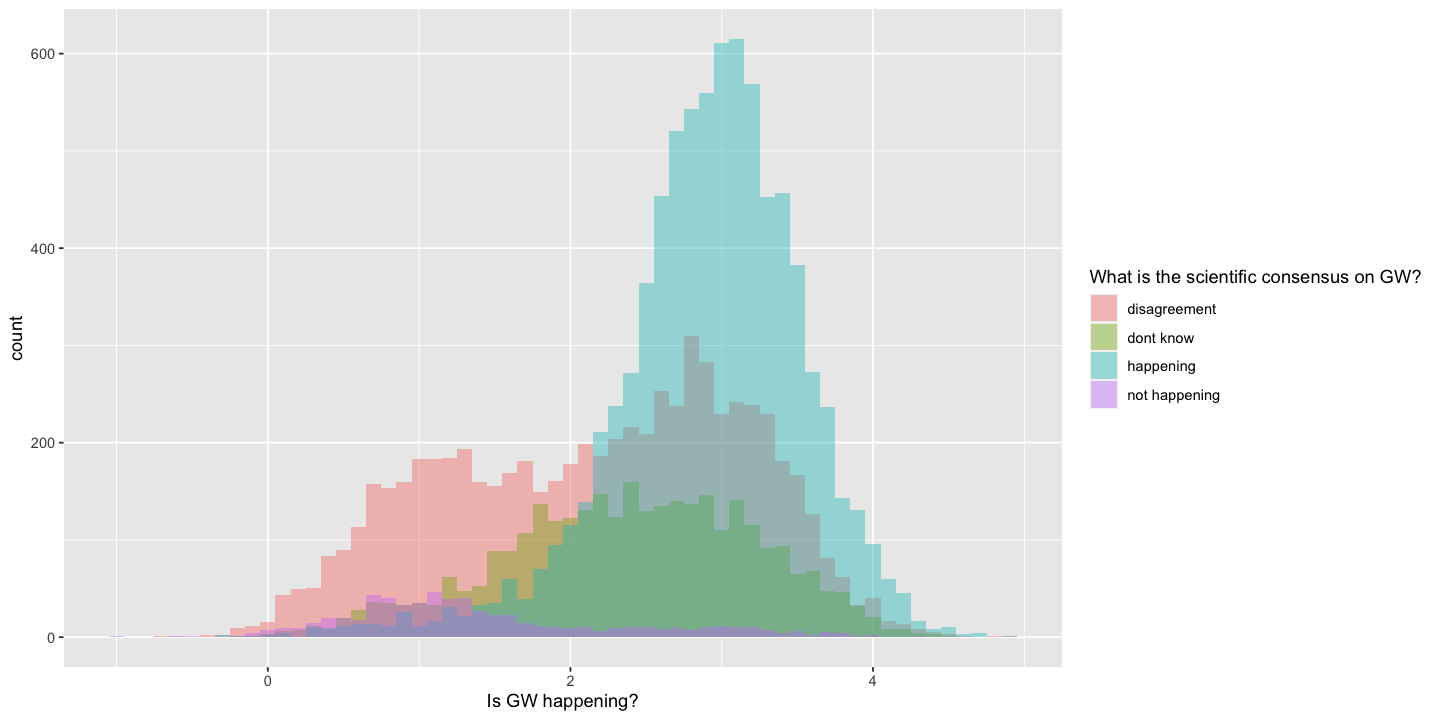

In [37]:
ggplot(data = survey_data, mapping = aes(x = happening_cont, fill = sci_consensus)) + 
    geom_histogram(binwidth=.1, alpha = .4, position="identity") +
    labs(x = 'Is GW happening?', fill = 'What is the scientific consensus on GW?')

#### 2.8 Density plot showing the distribution of a continuous variable, split by a second categorical variable based on color

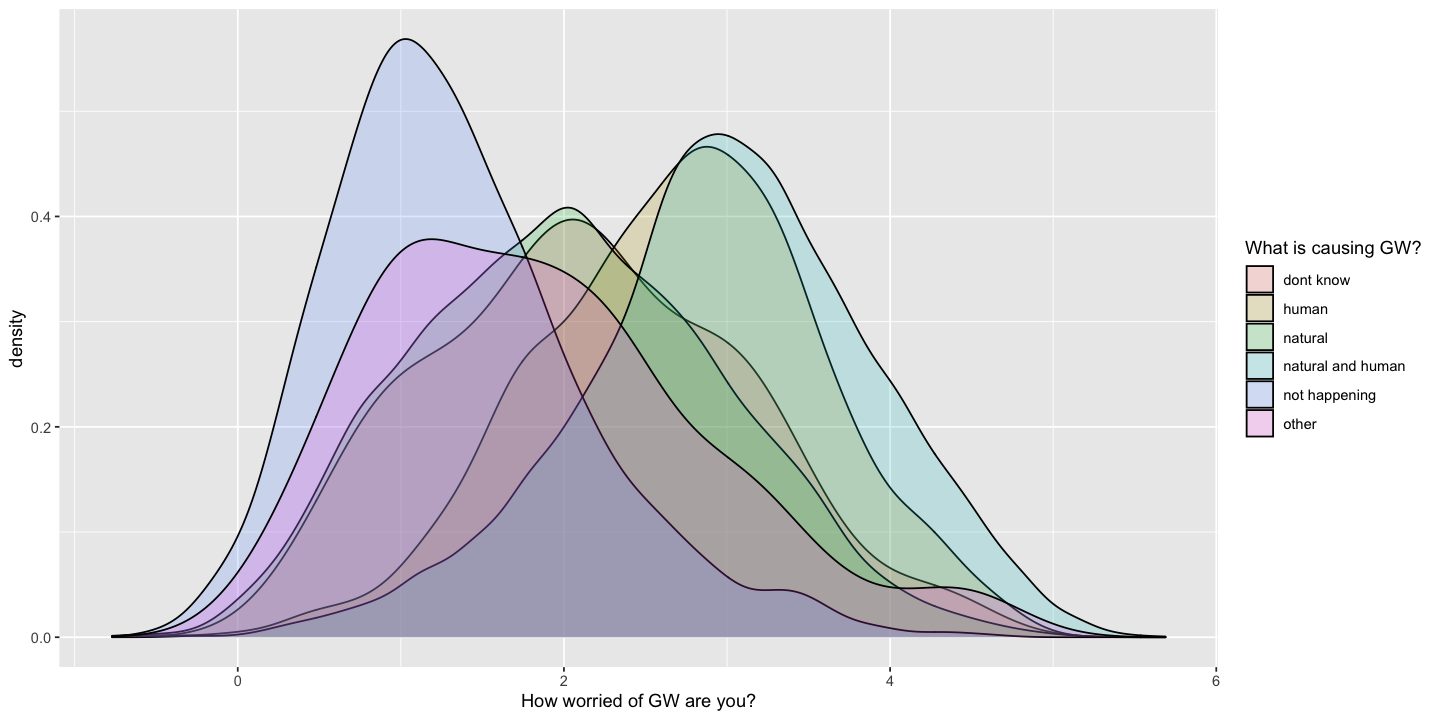

In [13]:
ggplot(data = survey_data, mapping = aes(x = worry_cont, fill = cause_recoded)) + 
    geom_density(alpha = .2) +
    labs(x = 'How worried of GW are you?', fill = 'What is causing GW?')

It's a bit crowded... so I will filter the dataset to exclude a few levels of the `cause_recoded` variable (we'll se more of this in the next weeks):

In [14]:
filtered_survey_data = filter(survey_data, 
                              cause_recoded != "dont know",
                              cause_recoded != "other")

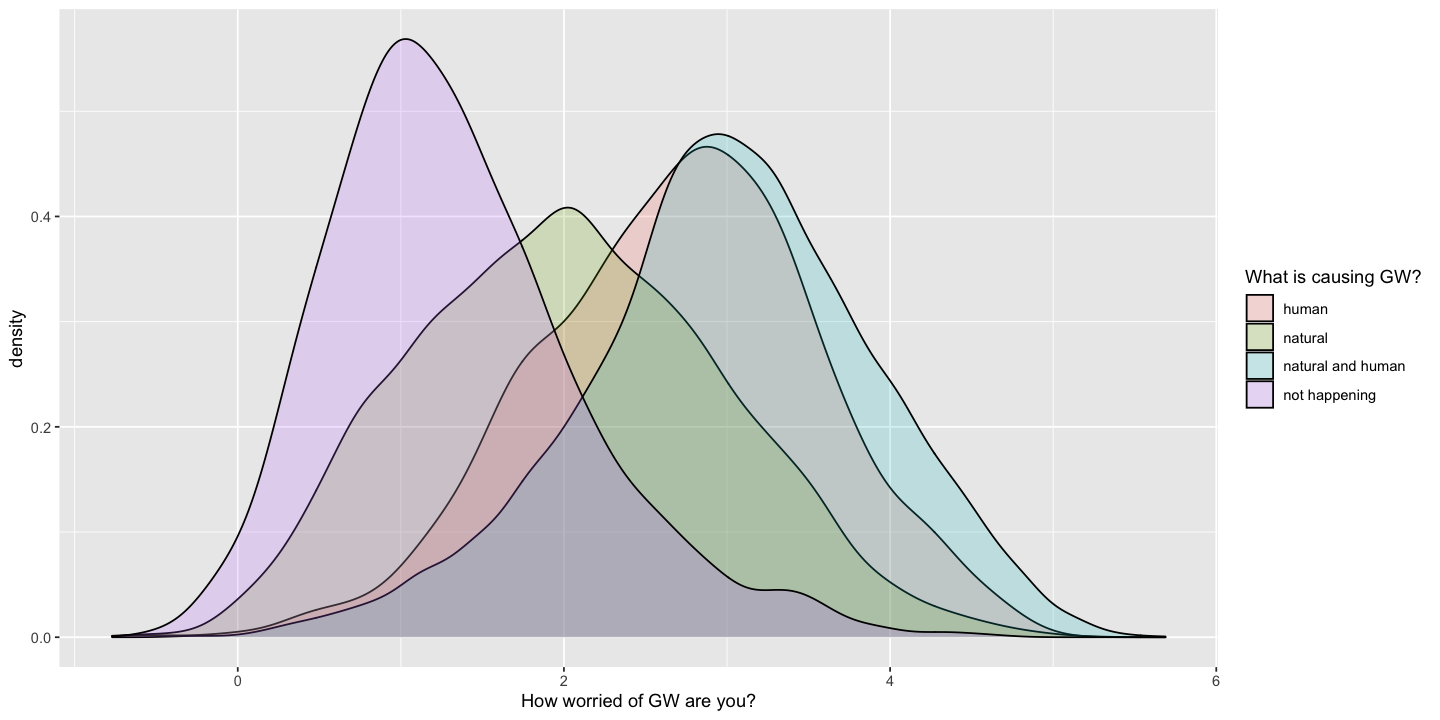

In [15]:
ggplot(data = filtered_survey_data, mapping = aes(x = worry_cont, fill = cause_recoded)) + 
    geom_density(alpha = .2) +
    labs(x = 'How worried of GW are you?', fill = 'What is causing GW?')

#### 2.9 Dot plot showing the mean of a continuous variable across different levels of a categorical variable, with error bars (representing standard error of the mean)

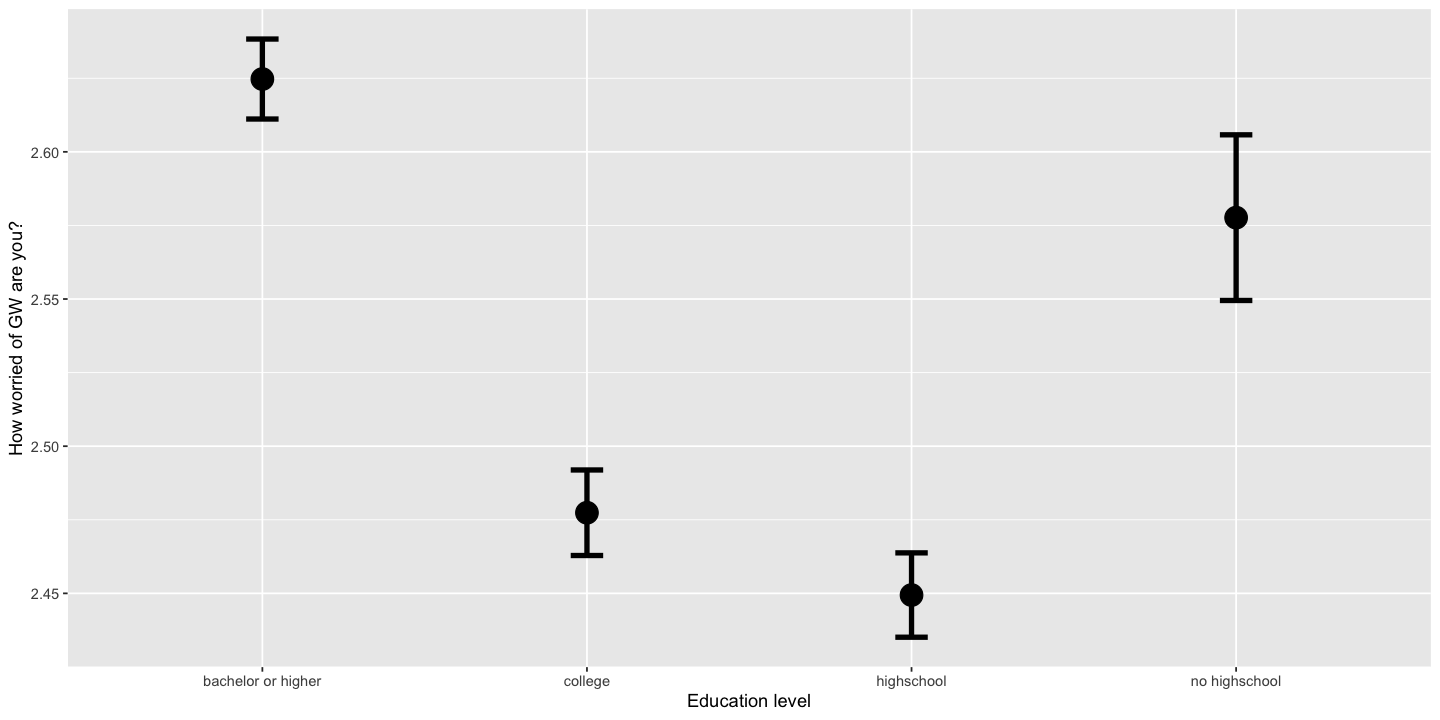

In [51]:
ggplot(data = filtered_survey_data, mapping = aes(x = educ_category_labels, y = worry_cont)) +
    # stat_summary with arg "fun":
    # A function that returns a single number, in this case the mean worry_cont for each level of educ_category_labels:
    stat_summary(fun = "mean", geom = "point", size = 6) +

    # mean_se( ) is intended for use with stat_summary. It calculates mean and 
    # standard error
    stat_summary(fun.data = mean_se, geom = "errorbar", size=1.5, width=.1) +

    labs(x = 'Education level', y = 'How worried of GW are you?')

#### 2.10 Bar plot showing the mean of a continuous variable across different levels of a categorical variable, with error bars (representing confidence intervals)

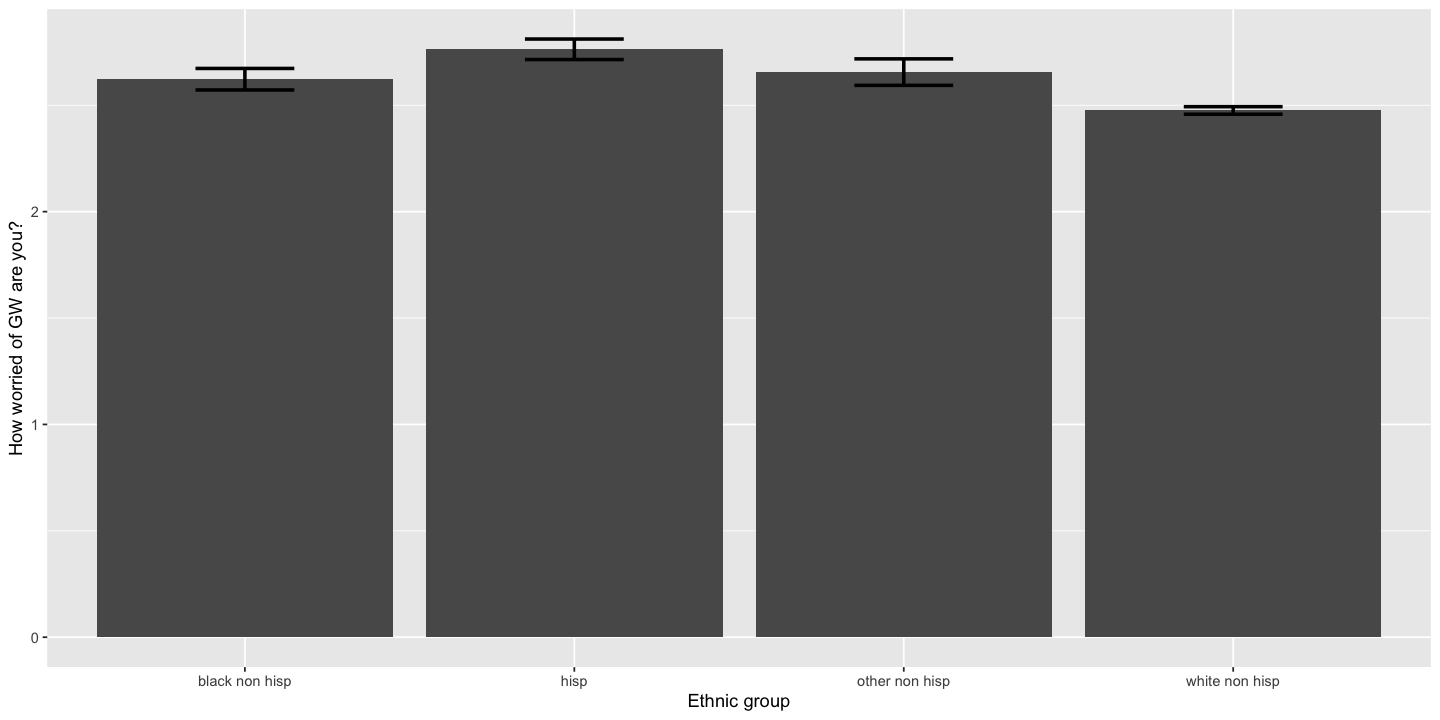

In [55]:
ggplot(data = filtered_survey_data, mapping = aes(x = race, y = worry_cont)) +
    # stat_summary with arg "fun.y":
    # A function that returns a single number, in this case the mean worry_cont for each level of cause_recoded:
    stat_summary(fun = "mean", geom="bar") +

    # mean_cl_normal( ) is intended for use with stat_summary. It calculates
    # sample mean and lower and upper Gaussian confidence limits based on the 
    # t-distribution
    stat_summary(fun.data = mean_cl_normal, geom = "errorbar", size=1, width=.3) +

    labs(x = 'Ethnic group', y = 'How worried of GW are you?')

## 3. Now it's your turn

First, load some new data in R and have a glimpse at it:

In [18]:
tdcs_data = read_csv('https://raw.githubusercontent.com/laurafontanesi/r-seminar/master/data/tdcs.csv')


── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  RT = col_double(),
  acc_spd = col_character(),
  accuracy = col_double(),
  angle = col_double(),
  block = col_double(),
  coherence = col_double(),
  dataset = col_character(),
  id = col_character(),
  left_right = col_double(),
  subj_idx = col_double(),
  tdcs = col_character(),
  trial_NR = col_double()
)




In [19]:
glimpse(tdcs_data)

Rows: 52,800
Columns: 12
$ RT         <dbl> 799, 613, 627, 1280, 800, 760, 719, 799, 520, 1066, 480, 62…
$ acc_spd    <chr> "spd", "spd", "spd", "acc", "spd", "acc", "acc", "spd", "sp…
$ accuracy   <dbl> 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,…
$ angle      <dbl> 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180,…
$ block      <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ coherence  <dbl> 0.4171, 0.4171, 0.4171, 0.4171, 0.4171, 0.4171, 0.4171, 0.4…
$ dataset    <chr> "berkeley", "berkeley", "berkeley", "berkeley", "berkeley",…
$ id         <chr> "S1.1", "S1.1", "S1.1", "S1.1", "S1.1", "S1.1", "S1.1", "S1…
$ left_right <dbl> 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1,…
$ subj_idx   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ tdcs       <chr> "sham", "sham", "sham", "sham", "sham", "sham", "sham", "sh…
$ trial_NR   <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, …


**Task A** 

1. Show the distribution of response times (`RT`) with a **density plot**, separately by the accuracy vs. speed conditions (`acc_spd`) using different colors of the density plots per condition. Be sure to adjust the transparency so that they are both clearly visible and put appropriate axes labels and legend title.

2. Show the distribution of response times (`RT`) with a **histogram**, separately by the accuracy vs. speed conditions (`acc_spd`) using different colors of the density plots per condition. Be sure to adjust the transparency and binwidth, so that they are clearly visible and put appropriate axes labels and legend title. This time, split it furtherly by TDCS manipulation (`tdcs`) using `facet_grid()`.

3. Show the response times (`RT`) with a **violinplot**, separately by the place the data were collected (`dataset`). Split further by accuracy vs. speed conditions using colors. Add the 10%, 30%, 50%, 70%, and 90% quantiles, that are the most common in response times data analyses. Change labels appropriately.

**Task B** 

Now, I am creating a summary of the data, where we look at mean response times and accuracy per subject, separately by coherence (how difficult the task was) and the speed vs. accuracy manipulation:

In [20]:
summary_tdcs_data = summarise(group_by(tdcs_data, id, coherence, acc_spd),
                              mean_RT=mean(RT), 
                              mean_accuracy=mean(accuracy))

glimpse(summary_tdcs_data)

`summarise()` has grouped output by 'id', 'coherence'. You can override using the `.groups` argument.



Rows: 176
Columns: 5
Groups: id, coherence [88]
$ id            <chr> "A10.1", "A10.1", "A10.2", "A10.2", "A11.1", "A11.1", "A…
$ coherence     <dbl> 0.4171, 0.4171, 0.4171, 0.4171, 0.4171, 0.4171, 0.4171, …
$ acc_spd       <chr> "acc", "spd", "acc", "spd", "acc", "spd", "acc", "spd", …
$ mean_RT       <dbl> 566.1254, 555.3443, 499.8281, 492.7937, 603.8807, 490.67…
$ mean_accuracy <dbl> 0.6237288, 0.6327869, 0.6561404, 0.6571429, 0.8771930, 0…


Using the summarized data:

1. Plot the relationship between mean response times (`mean_RT`) and mean accuracy (`mean_accuracy`) using a **scatterplot**. 

2. Use `facet_grid` to split the plot based on the speed vs. accuracy manipulation (`acc_spd`). 

3. Add the regression lines.

4. Change with appropriate plot titles and x- and y-axes labels. 

5. Add the coherence levels as color of the dots. Because coherence is a continuous variable and not categorical, you can use `scale_colour_gradient` to adjust the gradient. 

6. Change the color of the regression lines to grey.

**Task C**

Using the summarized data:

1. Plot the mean `mean_accuracy`, separately by `factor(coherence)` using `stat_summary` with arguments `geom="bar"` and `position = 'dodge'`. Split further based on the accuracy vs. speed manipulation (`acc_spd`) with different colors.

2. Now add error bars representing confidence intervals and using `stat_summary` again with arguments `width=.9`, `position = 'dodge'`. Adjust the `width` argument if the error bars are not centered in each of the bars.

3. Do the same again, but:
    - using points instead of bars
    - standard errors instead of confidence intervals
    - mean RTs instead of accuracy

*Note* that you do not need the `position = 'dodge'` here anymore, and that you might have to adjust `size` and `width` of the error bars.

## Submit your assignment

Save and email your script to me at [laura.fontanesi@unibas.ch](mailto:laura.fontanesi@unibas.ch) by the end of Friday.

## Additional reading material

You can find a more in-depth explanation on the [R for Data Science book](https://r4ds.had.co.nz/data-visualisation.html).